##### Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset

In [2]:
df = pd.read_csv('Fraud_check.csv')
df.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


##### taxable_income <= 30000 as "Risky" and others are "Good"

In [3]:
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins = [0, 30000, 100000], labels = ['RISKY', 'Good'])
df.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


##### Checking the shape of the dataset

In [4]:
df.shape

(600, 6)

##### Checking for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.3+ KB


##### Checking for duplicated values

In [6]:
df[df.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


##### Encode columns in numeric

In [7]:
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [8]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.206667,298.510000,15.558333,0.503333
std,0.500017,0.821958,0.405252,172.823358,8.842147,0.500406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,148.750000,8.000000,0.000000
50%,1.000000,1.000000,0.000000,298.500000,15.000000,1.000000
75%,1.000000,2.000000,0.000000,448.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,597.000000,30.000000,1.000000


In [9]:
df.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,84,10,1
1,1,0,0,398,18,1
2,0,1,0,481,30,1
3,1,2,0,574,15,1
4,0,1,0,4,28,0
5,0,0,0,336,0,0
6,0,0,0,205,8,1
7,1,2,0,390,3,1
8,0,2,0,285,12,1
9,1,0,0,465,4,1


##### Checking the skewness and kurtosis

In [10]:
col = df.select_dtypes(exclude = 'object').columns.tolist()

data = df[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()], index = ['Skewness', 'Kurtosis'])

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Skewness,-0.080265,-0.086622,1.452500,0.000031,0.018529,-0.013367
Kurtosis,-2.000236,-1.514965,0.110113,-1.203540,-1.167524,-2.006521


##### Correlation

In [11]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12, 10))
    cmap = sns.diverging_palette(240, 10, as_cmap = True)
    _ = sns.heatmap(corr, cmap = cmap, square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True, annot_kws = {'fontsize' : 12})

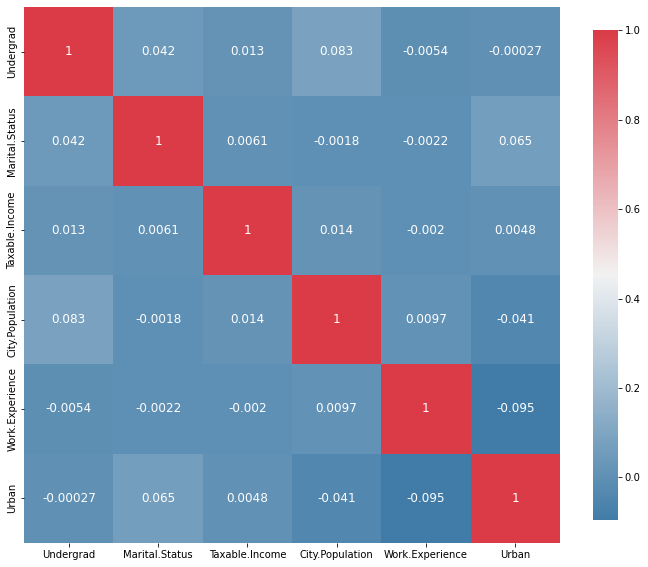

In [12]:
plot_correlation_map(df)

In [13]:
df.shape

(600, 6)

In [14]:
x = df.loc[:, ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']]
y = df['Taxable.Income']

##### Bagging

In [15]:
kfold = KFold(n_splits = 10, random_state = 10, shuffle = True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart, n_estimators = 20, random_state = 7)
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.7483333333333333


##### Random Forest Classification

In [16]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = 1000, max_features = 5, criterion = 'gini')
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.7483333333333333


##### AdaBoost Classification

In [17]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = AdaBoostClassifier(n_estimators = 10, random_state = 7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


##### Stacking Ensemble estimators for Classification

In [18]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

##### Create the sub models

In [19]:
estimators = []

model1 = LogisticRegression(max_iter = 500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

##### Create the ensemble model

In [20]:
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


In [21]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]